In [1]:
# library to import .mat file
import scipy.io as sio
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ks_2samp

In [2]:
# loading the .mat file
preProcess = ['FCC','TCC']
Thrs = ['GL','LG','LT','SD']
MeMs =['Fastcore','Swiftcore','MBA','mCADRE','GIMME']
# dataframe to store the data
df = pd.DataFrame(columns=['PreProcess','Threshold','MeM','Model','T_Blocked_count','F_Blocked_count'])
for pre in preProcess:
    for thr in Thrs:
        for mem in MeMs:
            for i in range(1,65):
                data = sio.loadmat('./Kim_et_al/TCC_results/'+pre+'/'+thr+'/'+mem+'/m'+str(i)+'.mat')
                T_Blocked_count=len([i[0][0] for i in data['a'] if i[0][0]=='Blocked'])
                data2 = sio.loadmat('./Kim_et_al/FCC_results/'+pre+'/'+thr+'/'+mem+'/m'+str(i)+'.mat')
                F_Blocked_count=len(data['a']) - len(data2['a'])
                # concatinating the data
                df_temp = pd.DataFrame({'PreProcess':pre,'Threshold':thr,'MeM':mem,'Model':'E'+str(2198+i),'T_Blocked_count':T_Blocked_count,
                    'F_Blocked_count':F_Blocked_count},index=[0])
                df = pd.concat([df,df_temp])
for thr in Thrs:
    mem = 'TOCS'
    for i in range(1,65):
        data = sio.loadmat('./Kim_et_al/TCC_results/'+pre+'/'+thr+'/'+mem+'/m'+str(i)+'.mat')
        T_Blocked_count=len([i[0][0] for i in data['a'] if i[0][0]=='Blocked'])
        data2 = sio.loadmat('./Kim_et_al/FCC_results/'+pre+'/'+thr+'/'+mem+'/m'+str(i)+'.mat')
        F_Blocked_count=len(data['a']) - len(data2['a'])
        # concatinating the data
        df_temp = pd.DataFrame({'PreProcess':pre,'Threshold':thr,'MeM':mem,'Model':'E'+str(2198+i),'T_Blocked_count':T_Blocked_count,
            'F_Blocked_count':F_Blocked_count},index=[0])
        df = pd.concat([df,df_temp])
df = df.reset_index(drop=True)
df['Threshold'] = df['Threshold'].map({'GL':'Global-80','LG':'LocalGini','LT':'LocalT2','SD':'StanDep'})
df['Pre-Processing Method'] = df['PreProcess'].map({'FCC':'FastCC','TCC':'ThermOptCC'})
df.T_Blocked_count = df.T_Blocked_count - df.F_Blocked_count
df.head()


,PreProcess,Threshold,MeM,Model,T_Blocked_count,F_Blocked_count,Pre-Processing Method
0,FCC,Global-80,Fastcore,E2199,0,0,FastCC
1,FCC,Global-80,Fastcore,E2200,9,0,FastCC
2,FCC,Global-80,Fastcore,E2201,11,0,FastCC
3,FCC,Global-80,Fastcore,E2202,16,0,FastCC
4,FCC,Global-80,Fastcore,E2203,11,0,FastCC


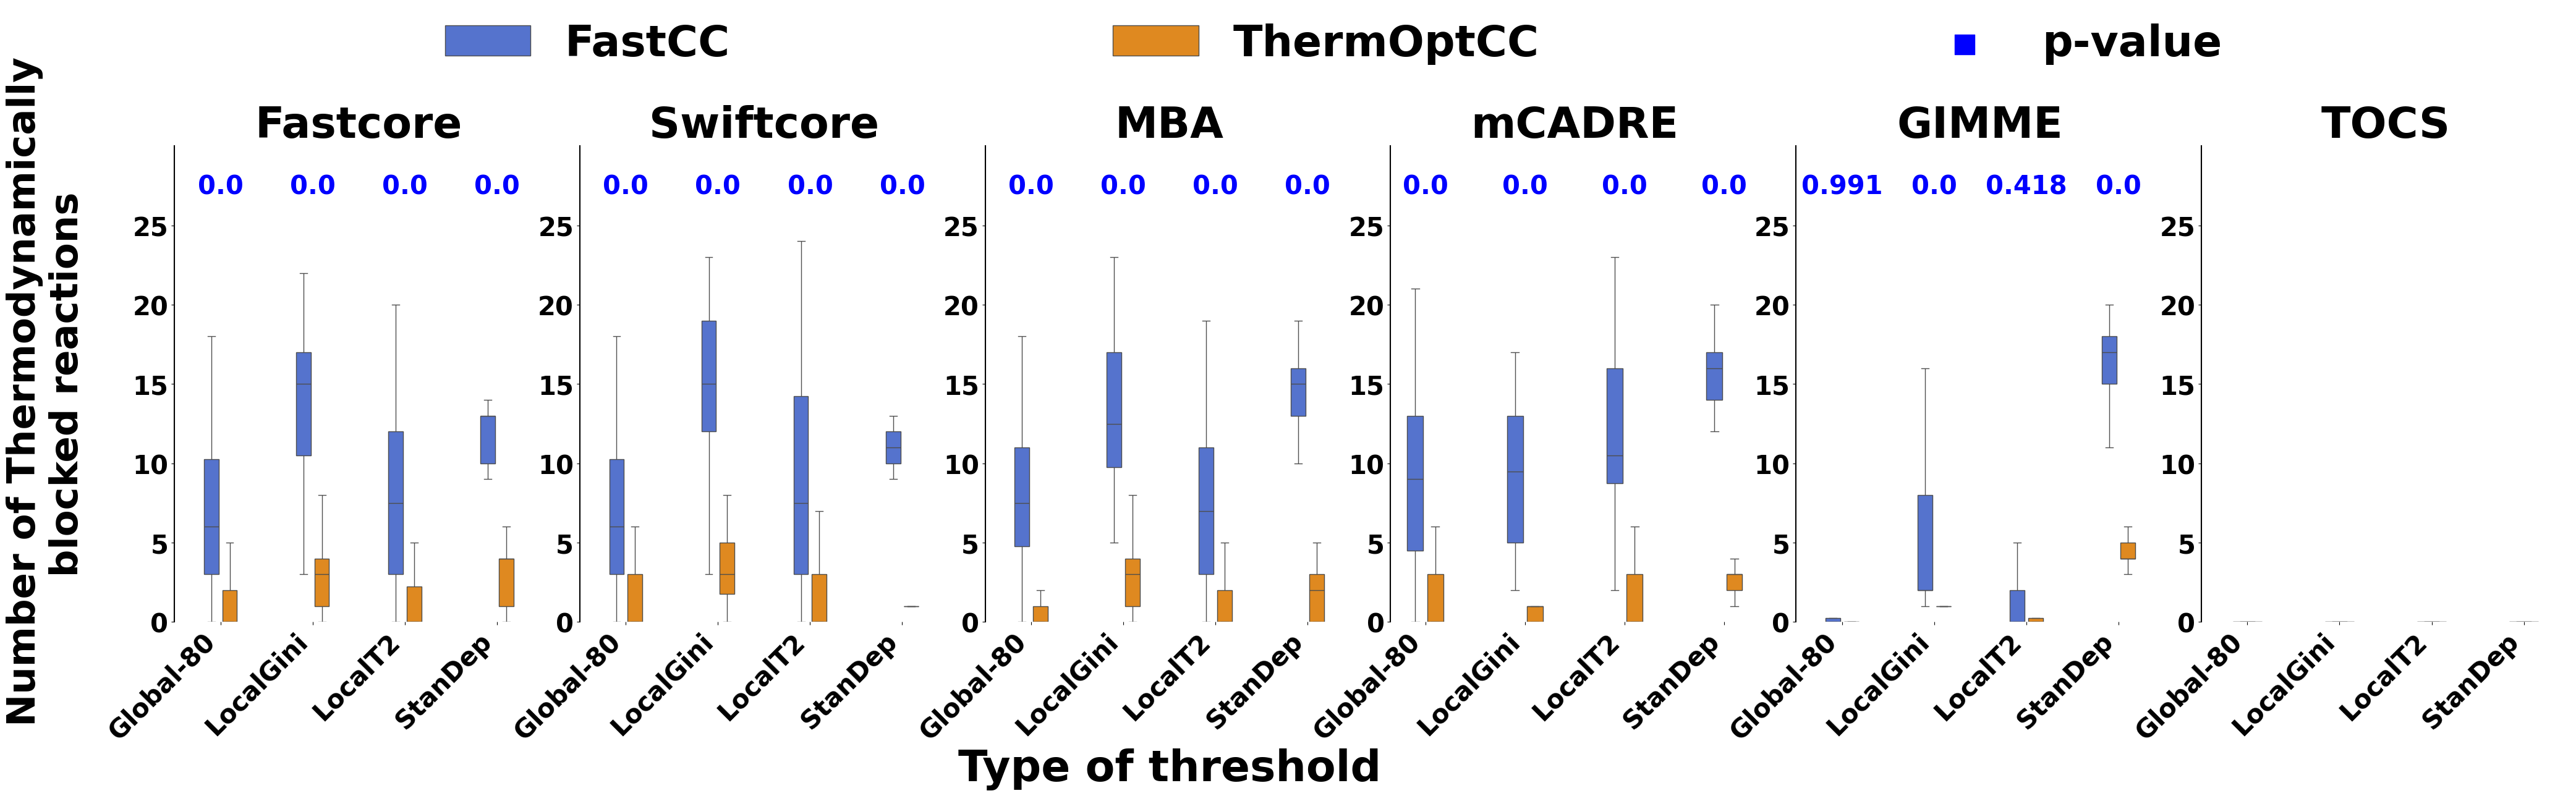

In [7]:
fig,axes = plt.subplots(1,6,figsize=(10*5,10))
axes = axes.flatten()
MeMs = ['Fastcore','Swiftcore','MBA','mCADRE','GIMME']
Thrs = ['Global-80','LocalGini','LocalT2','StanDep']
pal={'FastCC':'royalblue','ThermOptCC':'darkorange'}
for m,ax in zip(MeMs,axes):
    df0=df[df['MeM']==m]
    sns.boxplot(data=df0, x="Threshold", y="T_Blocked_count", hue="Pre-Processing Method",showfliers=False,width=.4,gap=0.2,ax=ax,palette=pal)
    ax.set_title(m,fontweight='bold',fontsize=50)
    # removing the spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # removing the legend
    ax.get_legend().remove()
    # remving the ylabel
    ax.set_ylabel('')
    # removing the xlabel
    ax.set_xlabel('')
    # making spines bold
    ax.spines['left'].set_linewidth(1.5)
    # setting the yticks
    ax.set_yticks(np.arange(0, 30, 5))
    ax.set_ylim(0,30)
    for t in Thrs:
        df1=df[(df['MeM']==m) & (df['Threshold']==t) & (df['Pre-Processing Method']=='FastCC')]
        df1 = df1['T_Blocked_count']

        df2=df[(df['MeM']==m) & (df['Threshold']==t) & (df['Pre-Processing Method']=='ThermOptCC')]
        df2 = df2['T_Blocked_count']
        result = ks_2samp(df1.values, df2.values)
        # adding the p-value to the plot
        ax.text(Thrs.index(t), 27, str(round(result[1],3)), color='blue',ha='center', fontsize=30,fontweight='bold')



m='TOCS'
ax=axes[-1]
df0=df[df['MeM']==m]
sns.boxplot(data=df0, x="Threshold", y="T_Blocked_count", hue="Pre-Processing Method",showfliers=False,width=.4,gap=0.2,ax=ax,palette=pal)
ax.set_title(m,fontweight='bold',fontsize=50)
# removing the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# removing the legend
ax.get_legend().remove()
# remving the ylabel
ax.set_ylabel('')
# removing the xlabel
ax.set_xlabel('')
# making spines bold
ax.spines['left'].set_linewidth(1.5)
# setting the yticks
ax.set_yticks(np.arange(0, 30, 5))
ax.set_ylim(0,30)

# reducing the spces between the subplots
plt.subplots_adjust(wspace=0.1)
axes[0].set_ylabel(f'Number of Thermodynamically \n blocked reactions \n',fontsize=45,fontweight='bold')
axes[2].set_xlabel('Type of threshold',fontsize=50,fontweight='bold')

# bold xticks and yticks
for ax in axes:
    plt.setp(ax.get_xticklabels(), fontweight='bold',fontsize=30,rotation=45,ha='right')
    plt.setp(ax.get_yticklabels(), fontweight='bold',fontsize=30)
axes[3].scatter([], [], label="p-value",color='blue',marker='s',s=500)
# sertting the legend at the bottom of the plot in a horizontal manner and giving color
# getting the handles and labels of the plot
handles, labels = axes[3].get_legend_handles_labels()
fig.legend(handles,labels, loc='lower center', bbox_to_anchor=(0.2, 0.95, 0.6, 1.),frameon=0,mode='expand',ncol=3,prop={'size':50,'weight':'bold'})
plt.savefig('FCC_vs_TCC_GSM.pdf',bbox_inches='tight')

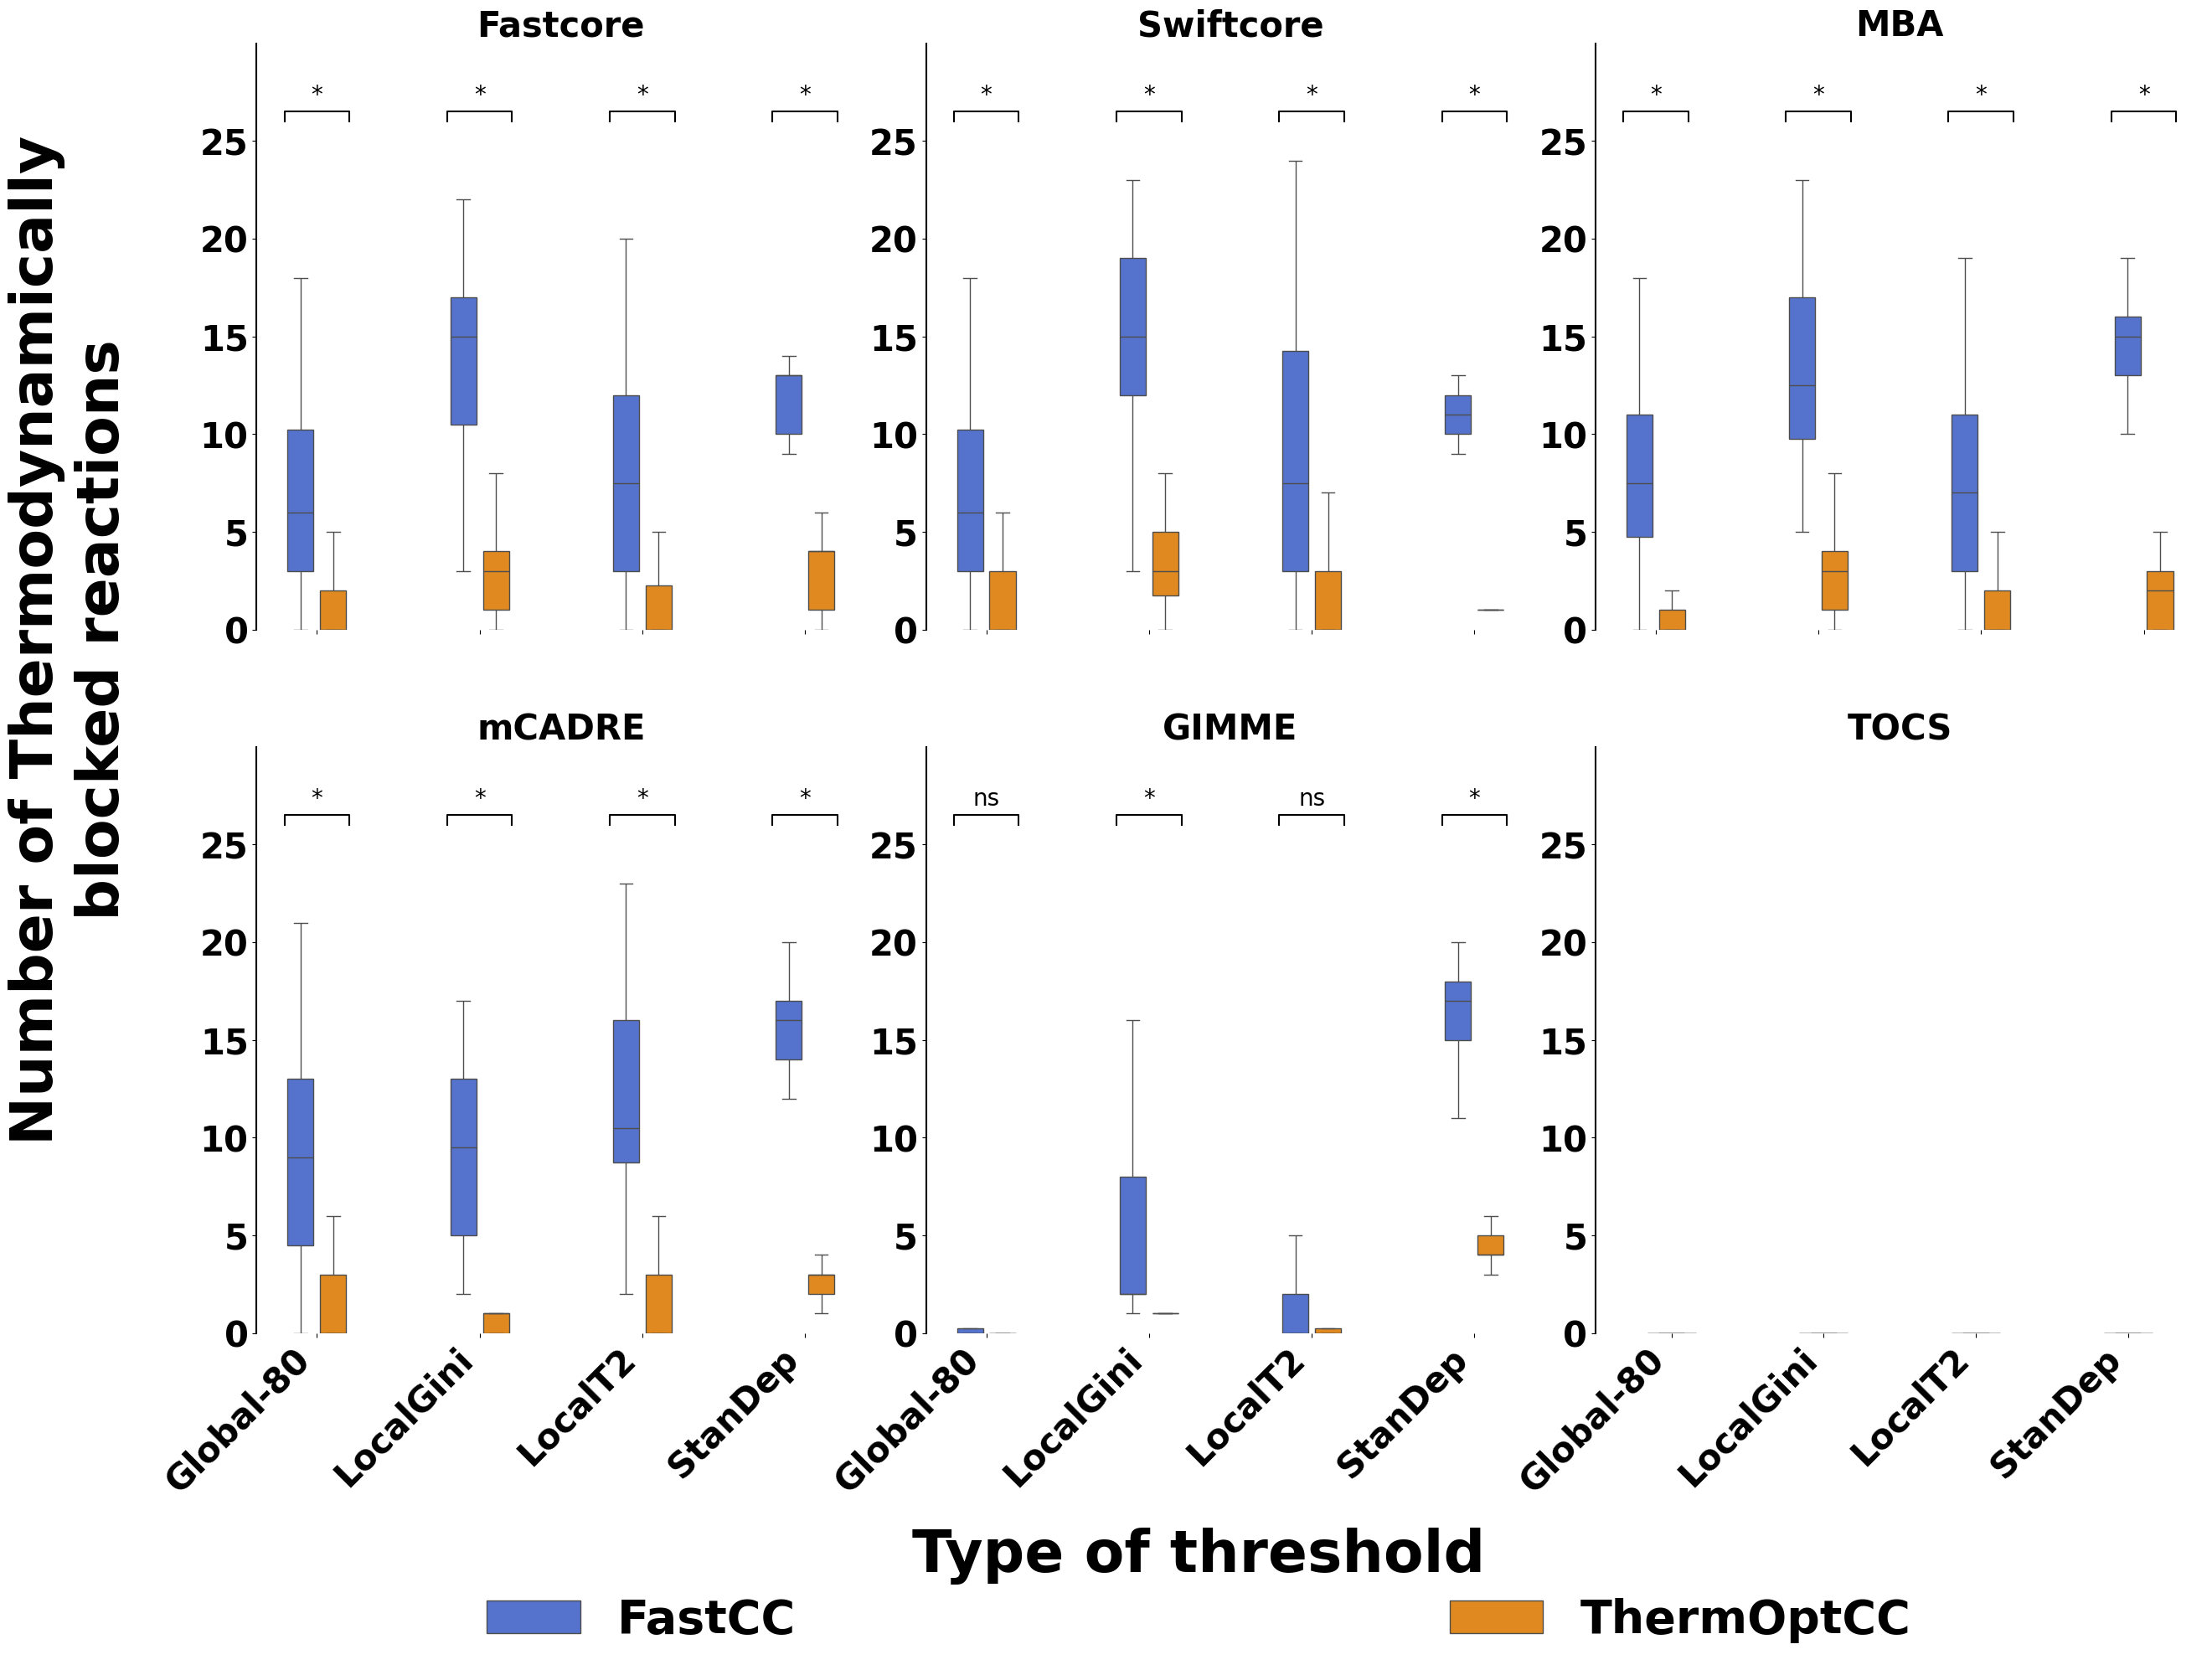

In [34]:
fig,axes = plt.subplots(2,3,figsize=(10*3,10*2))
axes = axes.flatten()
MeMs = ['Fastcore','Swiftcore','MBA','mCADRE','GIMME']
Thrs = ['Global-80','LocalGini','LocalT2','StanDep']
pal={'FastCC':'royalblue','ThermOptCC':'darkorange'}
for m,ax in zip(MeMs,axes):
    df0=df[df['MeM']==m]
    sns.boxplot(data=df0, x="Threshold", y="T_Blocked_count", hue="Pre-Processing Method",showfliers=False,width=.4,gap=0.2,ax=ax,palette=pal)
    ax.set_title(m,fontweight='bold',fontsize=30)
    # removing the spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # removing the legend
    ax.get_legend().remove()
    # remving the ylabel
    ax.set_ylabel('')
    # removing the xlabel
    ax.set_xlabel('')
    # making spines bold
    ax.spines['left'].set_linewidth(1.5)
    # setting the yticks
    ax.set_yticks(np.arange(0, 30, 5))
    ax.set_ylim(0,30)
    for t in Thrs:
        df1=df[(df['MeM']==m) & (df['Threshold']==t) & (df['Pre-Processing Method']=='FastCC')]
        df1 = df1['T_Blocked_count']

        df2=df[(df['MeM']==m) & (df['Threshold']==t) & (df['Pre-Processing Method']=='ThermOptCC')]
        df2 = df2['T_Blocked_count']
        result = ks_2samp(df1.values, df2.values)
        if result[1] < 0.05:
            text = '*'
        else:
            text = 'ns'
        # adding the p-value to the plot
        ax.text(Thrs.index(t), 27, text,ha='center', fontsize=20)
        ax.plot([Thrs.index(t)-0.2,Thrs.index(t)-0.2,Thrs.index(t)+0.2,Thrs.index(t)+0.2], [26,26.5,26.5,26], lw=1.5, c='k')



m='TOCS'
ax=axes[-1]
df0=df[df['MeM']==m]
sns.boxplot(data=df0, x="Threshold", y="T_Blocked_count", hue="Pre-Processing Method",showfliers=False,width=.4,gap=0.2,ax=ax,palette=pal)
ax.set_title(m,fontweight='bold',fontsize=30)
# removing the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# removing the legend
ax.get_legend().remove()
# remving the ylabel
ax.set_ylabel('')
# removing the xlabel
ax.set_xlabel('')
# making spines bold
ax.spines['left'].set_linewidth(1.5)
# setting the yticks
ax.set_yticks(np.arange(0, 30, 5))
for i in range(6):
    if i in [0,1,2]:
        axes[i].set_xticklabels([])
ax.set_ylim(0,30)

# reducing the spces between the subplots
plt.subplots_adjust(wspace=0.1)
axes[0].set_ylabel(f'Number of Thermodynamically \n blocked reactions \n', fontsize=50,fontweight='bold',y=0)
fig.supxlabel('Type of threshold', fontsize=50,fontweight='bold',x=0.5, y=-0.04)
# axes[0].set_ylabel(f'Number of Thermodynamically blocked reactions \n',fontsize=45,fontweight='bold')
# axes[4].set_xlabel('Type of threshold',fontsize=50,fontweight='bold')

# bold xticks and yticks
for i,ax in enumerate(axes):
    plt.setp(ax.get_xticklabels(), fontweight='bold',fontsize=30,rotation=45,ha='right')
    plt.setp(ax.get_yticklabels(), fontweight='bold',fontsize=30)
# axes[3].scatter([], [], label="p-value",color='blue',marker='s',s=500)
# sertting the legend at the bottom of the plot in a horizontal manner and giving color
# getting the handles and labels of the plot
handles, labels = axes[3].get_legend_handles_labels()
fig.legend(handles,labels, loc='lower center', bbox_to_anchor=(0.2, -0.1, 0.6, 1.),frameon=0,mode='expand',ncol=2,prop={'size':40,'weight':'bold'})
plt.savefig('FCC_vs_TCC_GSM_large.pdf',bbox_inches='tight')